# Introduction to Sage (using Jupyter/Cocalc)

#### This is an introduction to the basic functionality of Sage, with an emphasis on seeing how to handle a worksheet and how to get more detailed help.
    
#### Sage can be seen as a <span style="color:red">modified python language for mathematicians</span> with a <span style="color:red">HUGE distribution of softwares</span> and a <span style="color:red">HUGE library of mathematical functions</span>.

+ The list of packages (included softwares) can be found here: <https://doc.sagemath.org/html/en/reference/spkg/>
+ The comprehensive Reference Manual can be found here: <https://doc.sagemath.org/html/en/reference/index.html>

## Some quotes

### "You can read Sylow’s Theorem and its proof in Huppert’s book in the library [...] then you can use Sylow’s Theorem for the rest of your life free of charge, but for many computer algebra systems license fees have to be paid regularly [...].

### With this situation two of the most basic rules of conduct in mathematics are violated: 

### - In mathematics <span style="color:red">information is passed on free of charge and everything is laid open for checking</span>. Not applying these rules to computer algebra systems that are made for mathematical research [...] means moving in a most undesirable direction.

### Most important: 

### - Can we expect somebody to <span style="color:red">believe a result of a program that he is not allowed to see</span>?"

### <div style="text-align: right">– J. Neubüser in 1993 (he started GAP in 1986).</div>

### “I think, fundamentally, open source does tend to be more stable software. It’s the right way to do things. I compare it to <span style="color:red">science versus witchcraft</span>.

### In science, the whole system builds on people looking at other people’s results and building on top of them. 

### In witchcraft, somebody had a small secret and guarded it—but never allowed others to really understand it and build on it.”

### <div style="text-align: right">—Linus Torvalds.</div>

## Python+Sage = Python with a math brain

The language of SAGE is a slightly modified Python language. Python is an object oriented and therefore everything in SAGE are objects.

### Mathematical functions

There are a lot of usual mathematical functions already implemented in Sage:

#### Mathematical Constants and functions

In [1]:
pi,e,golden_ratio,euler_gamma,i,infinity

(pi, e, golden_ratio, euler_gamma, I, +Infinity)

In [2]:
e^(i*pi)

-1

In [3]:
log(57), exp(3), gcd(345,11142), lcm(20,24)

(log(57), e^3, 3, 120)

#### Trigonometry:

In [4]:
[arccos(pi/4),tan(pi),sin(pi/2)]

[arccos(1/4*pi), 0, 1]

#### Combinatorial tools

In [5]:
binomial(4,2),catalan_number(4),factorial(6),fibonacci(4),multinomial(3,4,5)

(6, 14, 720, 3, 27720)

#### Calculus

In [6]:
limit(1/x,x=infinity), derivative(sin(x),x),integrate(tan(x),x)

(0, cos(x), log(sec(x)))

#### Linear Algebra

In [7]:
M = matrix([[2,3],[7,10]])
det(M)

-1

In [8]:
identity_matrix(4)

[1 0 0 0]
[0 1 0 0]
[0 0 1 0]
[0 0 0 1]

In [9]:
zero_matrix(3)

[0 0 0]
[0 0 0]
[0 0 0]

#### Algebra

In [10]:
print(expand((x+3)^2))
print(factor(111))

x^2 + 6*x + 9
3 * 37


In [11]:
solve(x^2+7 > x^3-5,x)

[[x < 2.675888665325285]]

### New default classes and parsing

Sage comes with a new layer of classes on top of python. The most prominent example is the class `Integer`, which has more functionality:

In [12]:
Mcinco = -5

In [13]:
type(Mcinco)

<class 'sage.rings.integer.Integer'>

Notice that this is a **new class** that did not exist in python. The `int` still exists:

In [14]:
int_mcinco = int(-5)
type(int_mcinco)

<class 'int'>

You can compare the available methods for both objects and see the difference using the `tab` completion (press the `tab` key in the next two cells and compare):

In [15]:
Mcinco.

SyntaxError: invalid syntax (3090997185.py, line 1)

In [16]:
int_mcinco.

SyntaxError: invalid syntax (3106799166.py, line 1)

Which one offers more?

Of course, Sage knows about numbers and how to do the basic operations with them. It will always try to find the least complicated structure (rings, fields, groups, vector spaces, etc.) that allows to do the operation.

For example:

In [17]:
F = 3 * 7/11
print(F) # Returns a rational number
print(type(F))

21/11
<class 'sage.rings.rational.Rational'>


This is called "parsing". Sage **parses** the input you give it, and tries to interpret as reasonably as possible what is meant.

In [18]:
G = 49 * 11/7
print(G) # Returns an integer!!!
print(type(G)) # But the type remains a rational because rational numbers were used to obtain it

77
<class 'sage.rings.rational.Rational'>


See the difference if we use a decimal number:

In [19]:
H = 7.5 * 16/4
print(H) # Returns a decimal number!!!
print(type(H)) # But the type is a real number because decimal numbers were used to obtain it

30.0000000000000
<class 'sage.rings.real_mpfr.RealNumber'>


#### Python parser vs Sage parser 

One of the big differences is the difference when interpreting the `^` operator:

In [20]:
print([i**2 for i in range(10)])
print([i^2 for i in range(10)])

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


Sage **interprets** `^` as exponentiation and not as a `XOR` operator, so there is no difference between the two lists above.

Sage also always comes with `x` defined as a variable (this is not the case in python):

In [21]:
print(x,type(x))

x <class 'sage.symbolic.expression.Expression'>


### Coersion of classes (we do this all the time in math classes)

You can transform both G and H back into integers:

In [22]:
IntG = Integer(G)
print(type(IntG))
IntH = Integer(H)
print(type(IntH))

<class 'sage.rings.integer.Integer'>
<class 'sage.rings.integer.Integer'>


This is called **coersion**. Sage has a framework that allows to smoothly pass from a data structure (a rational number) to another (an integer) as long as it knows the recipe and the requirements (that the denominator should be "1" for example).

On a chalkboard, we do this all the time. And Sage does its best to do this as well. A good example is with the interplay between scalars, vectors and matrices (we'll see this later).

So, Sage is somehow the python language and a **math brain** on top of it.

As we saw above, sage likes to try and keep things in fraction format. But sometimes we don't want that. There's two different ways to get around that, we can either use `RR` to convert it to a real number or we can use `.n()` to convert it. The benefits of using `.n()` is we can specify the number of digits. Let's see how these work.

In [23]:
3/4

3/4

In [24]:
0.75

0.750000000000000

In [25]:
RR(3/4)

0.750000000000000

In [26]:
(3/4).n()

0.750000000000000

In [27]:
(3/4).n(digits=2)

0.75

We can also go back by going to the rational numbers using `QQ` as described above.

In [28]:
QQ(0.75)

3/4

#### Exercise 1:

Display the number `2/3` as a fraction, as a real number and as a real number with max 4 digits.

In [29]:
number = 2/3
print(number)
print(RR(number))
print(number.n(digits=4))

2/3
0.666666666666667
0.6667


#### Exercise 2:

Convert `e^(i*pi)` from an expression to a complex number (using `ComplexNumber`) and then to a Sage integer.

In [30]:
number = e^(i*pi)
print(type(number))
print(ComplexNumber(number))
print(Integer(number))

<class 'sage.symbolic.expression.Expression'>
-1.00000000000000
-1


### Examples of defaults classes known by Sage

Sage knows many many mathematical structures *out of the box*. They are typically named using a capitalized letter to differentiate them.

#### Subsets

You can define the subsets of the set {1,2,3,4}:

In [31]:
SS = Subsets(4); print(SS)

Subsets of {1, 2, 3, 4}


And enumerate it:

In [32]:
list(SS)

[{},
 {1},
 {2},
 {3},
 {4},
 {1, 2},
 {1, 3},
 {1, 4},
 {2, 3},
 {2, 4},
 {3, 4},
 {1, 2, 3},
 {1, 2, 4},
 {1, 3, 4},
 {2, 3, 4},
 {1, 2, 3, 4}]

#### Permutations

You can define the permutations of a certain size:

In [33]:
P = Permutations(4);P

Standard permutations of 4

In [34]:
list(P)

[[1, 2, 3, 4],
 [1, 2, 4, 3],
 [1, 3, 2, 4],
 [1, 3, 4, 2],
 [1, 4, 2, 3],
 [1, 4, 3, 2],
 [2, 1, 3, 4],
 [2, 1, 4, 3],
 [2, 3, 1, 4],
 [2, 3, 4, 1],
 [2, 4, 1, 3],
 [2, 4, 3, 1],
 [3, 1, 2, 4],
 [3, 1, 4, 2],
 [3, 2, 1, 4],
 [3, 2, 4, 1],
 [3, 4, 1, 2],
 [3, 4, 2, 1],
 [4, 1, 2, 3],
 [4, 1, 3, 2],
 [4, 2, 1, 3],
 [4, 2, 3, 1],
 [4, 3, 1, 2],
 [4, 3, 2, 1]]

##### Exercise 3:

List the permutations of {1,2,3,4,5} that finish with an inversion. Recall that $i$ is a inversion in a permutation $p$ if $p(i) \ge p(i+1)$.

In [35]:
[p for p in Permutations(5) if p(4)>p(5) ]

[[1, 2, 3, 5, 4],
 [1, 2, 4, 5, 3],
 [1, 2, 5, 4, 3],
 [1, 3, 2, 5, 4],
 [1, 3, 4, 5, 2],
 [1, 3, 5, 4, 2],
 [1, 4, 2, 5, 3],
 [1, 4, 3, 5, 2],
 [1, 4, 5, 3, 2],
 [1, 5, 2, 4, 3],
 [1, 5, 3, 4, 2],
 [1, 5, 4, 3, 2],
 [2, 1, 3, 5, 4],
 [2, 1, 4, 5, 3],
 [2, 1, 5, 4, 3],
 [2, 3, 1, 5, 4],
 [2, 3, 4, 5, 1],
 [2, 3, 5, 4, 1],
 [2, 4, 1, 5, 3],
 [2, 4, 3, 5, 1],
 [2, 4, 5, 3, 1],
 [2, 5, 1, 4, 3],
 [2, 5, 3, 4, 1],
 [2, 5, 4, 3, 1],
 [3, 1, 2, 5, 4],
 [3, 1, 4, 5, 2],
 [3, 1, 5, 4, 2],
 [3, 2, 1, 5, 4],
 [3, 2, 4, 5, 1],
 [3, 2, 5, 4, 1],
 [3, 4, 1, 5, 2],
 [3, 4, 2, 5, 1],
 [3, 4, 5, 2, 1],
 [3, 5, 1, 4, 2],
 [3, 5, 2, 4, 1],
 [3, 5, 4, 2, 1],
 [4, 1, 2, 5, 3],
 [4, 1, 3, 5, 2],
 [4, 1, 5, 3, 2],
 [4, 2, 1, 5, 3],
 [4, 2, 3, 5, 1],
 [4, 2, 5, 3, 1],
 [4, 3, 1, 5, 2],
 [4, 3, 2, 5, 1],
 [4, 3, 5, 2, 1],
 [4, 5, 1, 3, 2],
 [4, 5, 2, 3, 1],
 [4, 5, 3, 2, 1],
 [5, 1, 2, 4, 3],
 [5, 1, 3, 4, 2],
 [5, 1, 4, 3, 2],
 [5, 2, 1, 4, 3],
 [5, 2, 3, 4, 1],
 [5, 2, 4, 3, 1],
 [5, 3, 1, 4, 2],
 [5, 3, 2,

##### Exercise 4:

Write a function to list all fixed points of a given permutation. Then, write another function `der(n)` that lists all permutations of {1,2,...,n} without fixed point.

In [36]:
def list_fp(permu):
    return [_+1 for _ in range(len(permu)) if permu[_] == _+1 ]

def der(n):
    list_der = []
    for permu in Permutations(n):
        if len(list_fp(permu)) == 0: # There is no fixed points
            list_der += [permu]
    return list_der

In [37]:
der(4)

[[2, 1, 4, 3],
 [2, 3, 4, 1],
 [2, 4, 1, 3],
 [3, 1, 4, 2],
 [3, 4, 1, 2],
 [3, 4, 2, 1],
 [4, 1, 2, 3],
 [4, 3, 1, 2],
 [4, 3, 2, 1]]

We can collect the sequence and obtain information about that sequence with OEIS.

In [38]:
oeis([ len(der(n)) for n in range(8) ])

0: A000166: Subfactorial or rencontres numbers, or derangements: number of permutations of n elements with no fixed points.
1: A260081: Number of permutations p of [n] with no fixed points and cyclic displacement of elements restricted by three: p(i)<>i and (i-p(i) mod n <= 3 or p(i)-i mod n <= 3).
2: A257953: Number of permutations p of [n] with no fixed points and cyclic displacement of elements restricted by nine: p(i)<>i and (i-p(i) mod n <= 9 or p(i)-i mod n <= 9).

## Learning Sage by finding Help

### Help within Sage

To find help, just type the name of the mathematical concept/object that you wish to use (with first letter in upper and lower case) followed by the question mark and press `Shift+Enter`.

In [39]:
Matrix?

Signature:      Matrix(*args, **kwds)
Call signature: Matrix(*args, **kwargs)
Type:           cython_function_or_method
String form:    <cyfunction matrix at 0x7f1511afd8a0>
File:           ~/sage/src/sage/matrix/constructor.pyx
Docstring:     
   Create a matrix.

   This implements the "matrix" constructor:

      sage: matrix([[1,2],[3,4]])
      [1 2]
      [3 4]

   It also contains methods to create special types of matrices, see
   "matrix.[tab]" for more options. For example:

      sage: matrix.identity(2)
      [1 0]
      [0 1]

   INPUT:

   The "matrix()" command takes the entries of a matrix, optionally
   preceded by a ring and the dimensions of the matrix, and returns a
   matrix.

   The entries of a matrix can be specified as a flat list of
   elements, a list of lists (i.e., a list of rows), a list of Sage
   vectors, a callable object, or a dictionary having positions as
   keys and matrix entries as values (see the examples). If you pass
   in a callable object, th

This gives you the documentation for the function and many examples that you can copy/paste

In [40]:
M = Matrix([[1,2],[7,10]])

Now suppose we would like to change the base ring of the matrix, and we would like to learn how Sage does that.
You can start typing `M.change` and then hit `TAB` and see if sage offers you something.

In [41]:
M.change

AttributeError: 'sage.matrix.matrix_integer_dense.Matrix_integer_dense' object has no attribute 'change'

Then, you can add `??` after the function and you will be able to see the **source code** of the function. This is a great way to learn coding.

In [42]:
M.change_ring??

Docstring:
   Return the matrix obtained by coercing the entries of this matrix
   into the given ring.

   Always returns a copy (unless self is immutable, in which case
   returns self).

   EXAMPLES:

      sage: A = Matrix(QQ, 2, 2, [1/2, 1/3, 1/3, 1/4])
      sage: A.parent()
      Full MatrixSpace of 2 by 2 dense matrices over Rational Field
      sage: A.change_ring(GF(25,'a'))
      [3 2]
      [2 4]
      sage: A.change_ring(GF(25,'a')).parent()
      Full MatrixSpace of 2 by 2 dense matrices
       over Finite Field in a of size 5^2
      sage: A.change_ring(ZZ)
      Traceback (most recent call last):
      ...
      TypeError: matrix has denominators so can...t change to ZZ

   Changing rings preserves subdivisions:

      sage: A.subdivide([1], []); A
      [1/2 1/3]
      [-------]
      [1/3 1/4]
      sage: A.change_ring(GF(25,'a'))
      [3 2]
      [---]
      [2 4]
Source:   
    def change_ring(self, ring):
        """
        Return the matrix obtained by coercing 

### Search engines

There are 3 search engines that can help finding certain functions or methods in Sage:

+ `search_def` : searching within the name of function
+ `search_doc` : searching within the documentation strings of all sage functions
+ `search_src` : searching within ALL the source code of Sage

In [43]:
search_def("block_matrix")

matrix/special.py:1553:def _determine_block_matrix_grid(sub_matrices):
matrix/special.py:1630:def _determine_block_matrix_rows(sub_matrices):
matrix/special.py:1765:def block_matrix(*args, **kwds):

In [44]:
search_doc("solving systems")

en/constructions/linear_algebra.html:934:<span id="index-3"></span><h2>Solving systems of linear equations<a class="headerlink" href="#solving-systems-of-linear-equations" title="Link to this heading">#</a></h2>
en/constructions/linear_algebra.html:1096:<li><a class="reference internal" href="#solving-systems-of-linear-equations">Solving systems of linear equations</a></li>
en/constructions/index.html:289:<li class="toctree-l2"><a class="reference internal" href="linear_algebra.html#solving-systems-of-linear-equations">Solving systems of linear equations</a></li>
en/reference/polynomial_rings/sage/rings/polynomial/multi_polynomial_sequence.html:2030:dedicated to solving systems of boolean equations. Depending on
en/reference/interfaces/sage/interfaces/octave.html:277:routines for integrating, solving systems of equations, special
en/reference/categories/sage/categories/finite_dimensional_algebras_with_basis.html:1194:diagonal. In the context of solving systems of
en/reference/matrices/

In [45]:
search_src("BUG!")

graphs/graph_coloring.pyx:2145:        raise RuntimeError("this should not happen, please report a bug!")
sets/non_negative_integers.py:187:            #     raise ValueError("Infinite loop during DEBUG! TODO:remove me")
crypto/boolean_function.pyx:1094:        assert False, "you just found a bug!"
misc/random_testing.py:102:        Please report this bug!  You may be the first
misc/random_testing.py:109:        Please report this bug!  You may be the first
misc/random_testing.py:154:                print("Please report this bug!  You may be the first")
misc/random_testing.py:217:        Please report this bug!  You may be the first
misc/random_testing.py:233:        Please report this bug!  You may be the first
misc/random_testing.py:249:        Please report this bug!  You may be the first
modular/modsym/space.py:501:        assert d % n == 0, "the dimension of intersection must be a multiple of dimension of simple space.  bug!"
modular/btquotients/btquotient.py:3704:                

### Help within Jupyter Notebook

To discover how Jupyter works you can click `Help -> Show keyboard shortcuts` or `Help -> Tutorials, SymPy, Singular, IPython, matplotlib, etc.`

You also have direct access to the reference manual of many libraries.

### Thematic tutorials of Sage

Sage's webpage hosts **MANY** thematic tutorials aimed at teaching how certain functionalities of Sage work:

https://doc.sagemath.org/html/en/thematic_tutorials/index.html

You can go there and follow the tutorials by copy/pasting and looking how they work.

### Asking the Community

If you have general question or problems, you can write on the **Sage-Support** Google group:

* sage-support: [http://groups.google.com/group/sage-support](http://groups.google.com/group/sage-support)

First, you can do a search within the group to see if someone asked a similar question and otherwise ask your question.

* A second option is to use **AskSage**: [http://ask.sagemath.org/](http://ask.sagemath.org) (This is similar to Mathoverflow)

## Other interesting features in Sage

### Symbolic manipulations

We can do usual symbolic manipulations

In [46]:
f = (9*x) / (x - x^3)
f

-9*x/(x^3 - x)

Notice how in this case, `x` is a variable in the mathematical sense rather than a programming language sense. We normally call this type of variable a "symbolic variable". 

If we want, we can declare more than one variable at a time and get a function in multiple variables. We can even do inequalities if we want.

In [47]:
var('x','i','u')
f = (9*x - 7*i > 3 * (3*x - 7*u))
f

-7*i + 9*x > -21*u + 9*x

The nice thing is we can even solve these equations!

In [48]:
f.solve(i)[0][0]

1/3*i < u

We can also simplify things (among many things, you cna check all we can do using `tab` completion on the next expression:

In [49]:
complicated = 2*x-2*sin(x)/tan(x)+2*(x^3+1)^4
print(complicated)

2*(x^3 + 1)^4 + 2*x - 2*sin(x)/tan(x)


In [50]:
complicated.simplify_full()

2*x^12 + 8*x^9 + 12*x^6 + 8*x^3 + 2*x - 2*cos(x) + 2

### Method types in Sage (optional):

Only do this if you want a more in-depth understanding of creating classes. Other than that, you can skip this section and move onto the next part.

There are 4 types of methods for an object:
1. `a.function()` - These are normal methods and are the functions which are normally used when programming.
2. `a._hidden_attribute` - These are normally attributes that are hidden. They are created by the developer of the object for the developer
3. `a._private_` - (Only one `_` on both sides) These are hidden methods that are used by sage to manipulate the object.
4. `a.__private__` - (Two `_` on both sides) These are hidden methods that are used by python to manipulate the object.


#### Usual methods `a.function()`
These methods are the main method that you need to care about when working with sage. When you're normally working with objects you'll use these methods. This like the `name()` method we already defined previously.

We'll see examples using an object already defined in sage:

In [51]:
D = DiGraph([(1,2),(2,1),(3,2)])
type(D)

<class 'sage.graphs.digraph.DiGraph'>

In [52]:
# The degree is the number of edges that touch a vertex.
D.degree()

[2, 3, 1]

#### Hidden attributes `a._hidden`
These attributes are there for the person who is developing the object. It allows the developer to store something in a variable for the object. You **should never edit these attributes directly**.

In [53]:
# An attribute that sees if the graph is directed or not
D._directed

True

#### Private functions `a._private_()`

In python, private functions start with two "\_". To differentiate `python` private functions and `Sage` private functions, those starting with only one "\_" are from `Sage`.

The attributes/functions that start with "\_" and end by "\_" are functions used by the system Sage to manipulate the object.

For example, `_latex_` is a function that returns the latex code of the object. If this function exists in an object, Sage knows how to convert it to latex. It will use that function.

For example, "\_\_str\_\_" is the function that returns the string associated to an object. It is used by python to print the object in the terminal.

In [54]:
M = Matrix([[1,2,3],[4,5,6]])
M._latex_()

'\\left(\\begin{array}{rrr}\n1 & 2 & 3 \\\\\n4 & 5 & 6\n\\end{array}\\right)'

Having the definition of `_latex_` in the Matrix class allows for the following function call to work:

In [55]:
latex(M) # Sage private function

\left(\begin{array}{rrr}
1 & 2 & 3 \\
4 & 5 & 6
\end{array}\right)

In [56]:
str(M) # Python private function

'[1 2 3]\n[4 5 6]'

These methods are hidden methods that are there mainly for sage. It basically exists to help sage know what to do when a certain operation happens. For example. `D._matrix_()` is a function that exists so that if you call the function `matrix` on a digraph, sage knows what to do. For example:

Makes it so that you can do the following:

In [57]:
matrix(D) # obtain a matrix via a directed graph via a private function call

[0 1 0]
[1 0 0]
[0 1 0]

There are a ton of other sage methods that do similar things. Some examples include:
* \_ascii\_art\_
* \_latex\_
* \_matrix\_
* \_add\_, \_mul\_, etc.
* \_repr\_

#### Python private functions `a.__hidden__()`
These methods are also hidden methods, but are there mainly for python. A very similar thing happens between python and the object. These are called **special method names** and is also known as **operator overloading**. So see all possible methods, you can view the [documentation here](https://docs.python.org/3.8/reference/datamodel.html#special-method-names)

In [58]:
D.__str__()

'Digraph on 3 vertices'

In [59]:
str(D)

'Digraph on 3 vertices'

### Latex

Using latex outputs within Sage and getting latex code for Sage objects.

First, you can change the display format in the notebook to render it nicely, similar to latex.

Compare:

In [60]:
var('x1,x2,x3')
poly = x1^2+2*x1*x2^3+x3^6+3*x1^2*x3
poly

x3^6 + 2*x1*x2^3 + 3*x1^2*x3 + x1^2

with:

In [61]:
%display latex

followed by:

In [62]:
poly

x3^6 + 2*x1*x2^3 + 3*x1^2*x3 + x1^2

It is much easier to read! Remember the matrix M above? Execute the following line

In [63]:
M

[1 2 3]
[4 5 6]

You can come back to the plain display mode by typing:

In [64]:
%display plain

In [65]:
M

[1 2 3]
[4 5 6]

Imagine now that you would like to add the square of `poly` to a latex document. We really don't want to rewrite this because we are definitely going to make a mistake. Instead, we can have sage give us the latex and then we can copy+paste.

In [66]:
latex(expand(poly^2))

x_{3}^{12} + 4 \, x_{1} x_{2}^{3} x_{3}^{6} + 6 \, x_{1}^{2} x_{3}^{7} + 4 \, x_{1}^{2} x_{2}^{6} + 2 \, x_{1}^{2} x_{3}^{6} + 12 \, x_{1}^{3} x_{2}^{3} x_{3} + 4 \, x_{1}^{3} x_{2}^{3} + 9 \, x_{1}^{4} x_{3}^{2} + 6 \, x_{1}^{4} x_{3} + x_{1}^{4}

And now we see that we can copy this and paste it into latex with no problem 😊

### Can we latex more complicated objects? Like polytopes?

We can latex almost evertything! In essence, any object that has the method `_latex_` can give latex. Let's see some examples.

In [67]:
%display latex
M = matrix([[i^j for j in range(1,10)] for i in range(1,10)])
M

[        1         1         1         1         1         1         1         1         1]
[        2         4         8        16        32        64       128       256       512]
[        3         9        27        81       243       729      2187      6561     19683]
[        4        16        64       256      1024      4096     16384     65536    262144]
[        5        25       125       625      3125     15625     78125    390625   1953125]
[        6        36       216      1296      7776     46656    279936   1679616  10077696]
[        7        49       343      2401     16807    117649    823543   5764801  40353607]
[        8        64       512      4096     32768    262144   2097152  16777216 134217728]
[        9        81       729      6561     59049    531441   4782969  43046721 387420489]

In [68]:
%display plain
latex(M)

\left(\begin{array}{rrrrrrrrr}
1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
2 & 4 & 8 & 16 & 32 & 64 & 128 & 256 & 512 \\
3 & 9 & 27 & 81 & 243 & 729 & 2187 & 6561 & 19683 \\
4 & 16 & 64 & 256 & 1024 & 4096 & 16384 & 65536 & 262144 \\
5 & 25 & 125 & 625 & 3125 & 15625 & 78125 & 390625 & 1953125 \\
6 & 36 & 216 & 1296 & 7776 & 46656 & 279936 & 1679616 & 10077696 \\
7 & 49 & 343 & 2401 & 16807 & 117649 & 823543 & 5764801 & 40353607 \\
8 & 64 & 512 & 4096 & 32768 & 262144 & 2097152 & 16777216 & 134217728 \\
9 & 81 & 729 & 6561 & 59049 & 531441 & 4782969 & 43046721 & 387420489
\end{array}\right)

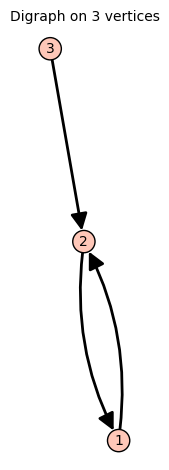

In [69]:
%display latex
D = DiGraph([(1,2), (2,1), (3,2)])
D

In [70]:
%display plain
latex(D)

\begin{tikzpicture}
\definecolor{cv0}{rgb}{0.0,0.0,0.0}
\definecolor{cfv0}{rgb}{1.0,1.0,1.0}
\definecolor{clv0}{rgb}{0.0,0.0,0.0}
\definecolor{cv1}{rgb}{0.0,0.0,0.0}
\definecolor{cfv1}{rgb}{1.0,1.0,1.0}
\definecolor{clv1}{rgb}{0.0,0.0,0.0}
\definecolor{cv2}{rgb}{0.0,0.0,0.0}
\definecolor{cfv2}{rgb}{1.0,1.0,1.0}
\definecolor{clv2}{rgb}{0.0,0.0,0.0}
\definecolor{cv0v1}{rgb}{0.0,0.0,0.0}
\definecolor{cv1v0}{rgb}{0.0,0.0,0.0}
\definecolor{cv2v1}{rgb}{0.0,0.0,0.0}
%
\Vertex[style={minimum size=1.0cm,draw=cv0,fill=cfv0,text=clv0,shape=circle},LabelOut=false,L=\hbox{$1$},x=0.0cm,y=5.0cm]{v0}
\Vertex[style={minimum size=1.0cm,draw=cv1,fill=cfv1,text=clv1,shape=circle},LabelOut=false,L=\hbox{$2$},x=2.4566cm,y=2.5434cm]{v1}
\Vertex[style={minimum size=1.0cm,draw=cv2,fill=cfv2,text=clv2,shape=circle},LabelOut=false,L=\hbox{$3$},x=5.0cm,y=0.0cm]{v2}
%
\Edge[lw=0.1cm,style={post, bend right,color=cv0v1,},](v0)(v1)
\Edge[lw=0.1cm,style={post, bend right,color=cv1v0,},](v1)(v0)
\Edge[lw=0.1cm,style={

It is also possible to visualize the latex code with the command `view` (might not work on cocalc or if you do not have a latex compiler installed).

In [71]:
view(latex(D))

But! We can't do it for everything.

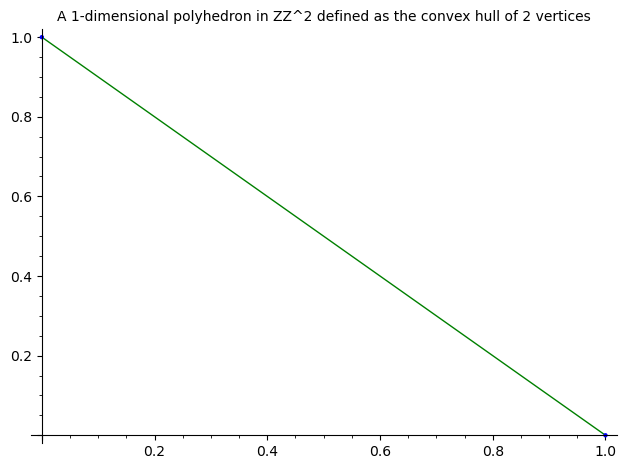

In [72]:
%display latex
P = Polyhedron(vertices=[(1,0), (0,1)])
P

In [73]:
%display plain
latex(P)

\text{\texttt{A{ }1{-}dimensional{ }polyhedron{ }in{ }ZZ{\char`\^}2{ }defined{ }as{ }the{ }convex{ }hull{ }of{ }2{ }vertices}}

Notice that the latex is just giving us the latex string and not the plot itself. In *this* case there is a way around this, but we aren't always so lucky. For this particular example we can use a latex of the plot in order to get latex:

In [74]:
latex(P.plot())

%% Creator: Matplotlib, PGF backend
%%
%% To include the figure in your LaTeX document, write
%%   \input{<filename>.pgf}
%%
%% Make sure the required packages are loaded in your preamble
%%   \usepackage{pgf}
%%
%% Also ensure that all the required font packages are loaded; for instance,
%% the lmodern package is sometimes necessary when using math font.
%%   \usepackage{lmodern}
%%
%% Figures using additional raster images can only be included by \input if
%% they are in the same directory as the main LaTeX file. For loading figures
%% from other directories you can use the `import` package
%%   \usepackage{import}
%%
%% and then include the figures with
%%   \import{<path to file>}{<filename>.pgf}
%%
%% Matplotlib used the following preamble
%%   \def\mathdefault#1{#1}
%%   \everymath=\expandafter{\the\everymath\displaystyle}
%%   
%%   \usepackage{fontspec}
%%   \setmainfont{DejaVuSerif.ttf}[Path=\detokenize{/home/jplabbe/sage/local/var/lib/sage/venv-python3.11.8/lib/python3.11/sit

Notice how complicated this is. So it's not necessarily the best way to go around it, but it definitely is easier than trying to do everything by hand. We'll see where this becomes more useful in the following section.

One thing to notice is that this doesn't work once we go into three dimensions:

In [75]:
P = Polyhedron([(1,0,0), (0,1,0), (0,0,1)])
latex(P.plot())

\text{\texttt{Graphics3d{ }Object}}

### **But!!!!** There is a `tikz` generator for polytopes!!!

In [76]:
P.tikz()

/home/jplabbe/sage/src/sage/geometry/polyhedron/base6.py:616: DeprecationWarning: The default type of the returned object will soon be changed from `sage.misc.latex.LatexExpr` to `sage.misc.latex_standalone.TikzPicture`.  Please update your code to specify the desired output type as `.tikz(output_type='LatexExpr')` to keep the old behavior or `.tikz(output_type='TikzPicture')` to use the future default behavior.
See https://github.com/sagemath/sage/issues/33002 for details.
  return self.projection().tikz(view, angle, scale,


\begin{tikzpicture}%
	[x={(1.000000cm, 0.000000cm)},
	y={(-0.000000cm, 1.000000cm)},
	z={(0.000000cm, -0.000000cm)},
	scale=1.000000,
	back/.style={loosely dotted, thin},
	edge/.style={color=blue!95!black, thick},
	facet/.style={fill=blue!95!black,fill opacity=0.800000},
	vertex/.style={inner sep=1pt,circle,draw=green!25!black,fill=green!75!black,thick}]
%
%
%% This TikZ-picture was produced with Sagemath version 10.4.beta8
%% with the command: ._tikz_2d_in_3d and parameters:
%% view = [0, 0, 1]
%% angle = 0
%% scale = 1
%% edge_color = blue!95!black
%% facet_color = blue!95!black
%% opacity = 0.8
%% vertex_color = green
%% axis = False
%%
%% Coordinate of the vertices:
%%
\coordinate (0.00000, 0.00000, 1.00000) at (0.00000, 0.00000, 1.00000);
\coordinate (0.00000, 1.00000, 0.00000) at (0.00000, 1.00000, 0.00000);
\coordinate (1.00000, 0.00000, 0.00000) at (1.00000, 0.00000, 0.00000);
%%
%%
%% Drawing the interior
%%
\fill[facet] (1.00000, 0.00000, 0.00000) -- (0.00000, 0.00000, 1.0000

#### For more on this, see the tutorial online: <https://doc.sagemath.org/html/en/thematic_tutorials/geometry/polytope_tikz.html>

### Many variables, all at once

If you want to create $10$ variables all at the same time, all with the same prefix, you can use `var` to do that for you. For example:

In [77]:
my_variables = var('x', n=10);my_variables

(x0, x1, x2, x3, x4, x5, x6, x7, x8, x9)

### How to reconstruct objects?

Say you've done a million things and get to an object that you don't know how to create. You can use `sage_input` to tell you how to create this object.

In [78]:
sage_input(M)

matrix(ZZ, [[1, 1, 1, 1, 1, 1, 1, 1, 1], [2, 4, 8, 16, 32, 64, 128, 256, 512], [3, 9, 27, 81, 243, 729, 2187, 6561, 19683], [4, 16, 64, 256, 1024, 4096, 16384, 65536, 262144], [5, 25, 125, 625, 3125, 15625, 78125, 390625, 1953125], [6, 36, 216, 1296, 7776, 46656, 279936, 1679616, 10077696], [7, 49, 343, 2401, 16807, 117649, 823543, 5764801, 40353607], [8, 64, 512, 4096, 32768, 262144, 2097152, 16777216, 134217728], [9, 81, 729, 6561, 59049, 531441, 4782969, 43046721, 387420489]])

In [79]:
e = M.eigenvalues()[0]
e

0.006133663908296074?

In [80]:
%display plain
sage_input(e)

R.<x> = QQbar[]
QQbar.polynomial_root(AA.common_polynomial(x^9 - 405071317*x^8 + 864297227343336*x^7 - 25256152543939916688*x^6 + 20609017561350538001280*x^5 - 909545284940048444620800*x^4 + 4172169726831000783052800*x^3 - 3098609363021404151808000*x^2 + 318006885258551623680000*x - 1834933472251084800000), CIF(RIF(RR(0.0061336639082960739), RR(0.0061336639082960748)), RIF(RR(0))))

Why is this so complicated?

Because the type of `e` isn't an integer:

In [81]:
type(e)

<class 'sage.rings.qqbar.AlgebraicNumber'>

## More exercises

### Polynomials

#### Roots of a polynomial
 
 Look in the documentation how to write a polynomial and define the following one.
 $$
 P = x^3- 3\cdot x^2 + 1.
 $$


In [82]:
P = x^3 - 3*x^2 + 1

Draw this polynomial on the interval $[1,3]$.

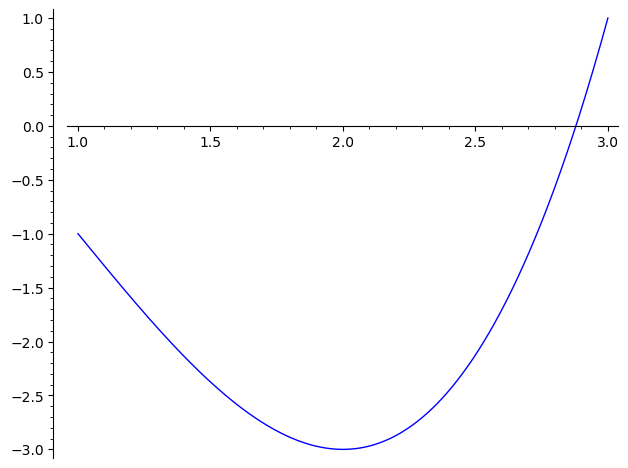

In [83]:
P.plot(1,3)

Determine the roots of this polynomial.

In [84]:
P.roots()

[(-1/2*(I*sqrt(3) + 1)*(1/2*I*sqrt(3) + 1/2)^(1/3) - 1/2*(-I*sqrt(3) + 1)/(1/2*I*sqrt(3) + 1/2)^(1/3) + 1,
  1),
 (-1/2*(1/2*I*sqrt(3) + 1/2)^(1/3)*(-I*sqrt(3) + 1) - 1/2*(I*sqrt(3) + 1)/(1/2*I*sqrt(3) + 1/2)^(1/3) + 1,
  1),
 ((1/2*I*sqrt(3) + 1/2)^(1/3) + 1/(1/2*I*sqrt(3) + 1/2)^(1/3) + 1, 1)]

What do you notice? Do you find this normal?

Answer: We see radicals and complex numbers, but in the plot we saw that there is (at least) one real root.

It is also possible to find the approximated values of roots when we specify the interval where to look for the root. Look for the function that allows to do this and determine an approximate value of the three roots by specifying the three intervals.

In [85]:
P.find_root(2.5,3)

2.8793852415719243

In [86]:
P.find_root(0,1)

0.6527036446661393

In [87]:
P.find_root(-1,0)

-0.532088886237956

#### Polynomial interpolation
 
Find the (minimal degree) polynomial that passes through the following points: $[1,2]$, $[3,2]$, $[-1,-1]$ and $[4,3]$.


In [88]:
T.<x> = PolynomialRing(QQ);
T.lagrange_polynomial([[1,2],[3,2],[-1,-1],[4,3]])

17/120*x^3 - 4/5*x^2 + 163/120*x + 13/10

#### Polynomial factorization

Find the factorizations of the polynomial $54\cdot x^4+36\cdot x^3-102\cdot x^2-72\cdot x-12$ over the following rings: $\mathbb{Z}, \mathbb{Q}$, and the algebraic numbers. With a bit more search, for $\mathbb{Q}[\sqrt{2}], GF(5)$.

In [89]:
# A.<x> = PolynomialRing(QQ)
# A.<x> = PolynomialRing(ZZ)
A.<x> = PolynomialRing(QQbar)
F = 54*x^4 + 36*x^3 - 102*x^2 - 72*x - 12
F.factor()

(54) * (x - 1.414213562373095?) * (x + 1.414213562373095?) * (x + 0.3333333333333334?)^2

In [90]:
t = var('t') # to reset the variable from the above 't'
B.<a> = QQ.extension(t^2 - 2); # 'a' is the new value added representing 'sqrt(2)'
A.<x> = PolynomialRing(B) # creating the polynomial ring
F = A(54*x^4 + 36*x^3 - 102*x^2 - 72*x - 12) # making sure that the polynomial lives in 'A'
F.factor()

(54) * (x - a) * (x + a) * (x + 1/3)^2

### Multivariate polynomials

Find in the documentation the way to define the ring of polynomials $R$ with two variables $y$ and $t$ with rationals coefficients.

In [91]:
R.<y,t> = PolynomialRing(QQ);R

Multivariate Polynomial Ring in y, t over Rational Field

Define the polynomial $Q = y^2 - 1 - 2\cdot t + t^3$.

In [92]:
Q = y^2-1-2*t+t^3;Q

t^3 + y^2 - 2*t - 1

Show it in 3 dimensions.

In [93]:
plot3d(Q,(t,-2,2),(y,-2,2))

Graphics3d Object

### Matrix calculus

#### Inverse of matrices

Look in the documentation how to define a matrix with rational coefficients. Define the matrix:
$$
M = 
\left(
\begin{array}{ccc}
2 & 4 & 1 \\
8 & 9 & 2 \\ 
3 & 7 & 3
\end{array}
\right)
$$

In [94]:
M = matrix(QQ,[[2,4,1],[8,9,2],[3,7,3]])

Do the same thing but in the Symbolic ring.

In [95]:
M = matrix(SR,[[2,4,1],[8,9,2],[3,7,3]])

Verify that it is invertible by computing the determinant:

In [96]:
M.det() # or det(M), 'det' is one of the rare math. functions to be a 'universal' function

-17

Compute now the inverse of this matrix:

In [97]:
M.inverse()

[-13/17   5/17   1/17]
[ 18/17  -3/17  -4/17]
[-29/17   2/17  14/17]

#### Kernel
 
 Now define the following matrix:
 $$
 N = \left( 
 \begin{array}{ccc}
 1 & 2 & 3 \\
 4 & 5 & 6 \\
 7 & 8 & 9
 \end{array}
 \right)
 $$

In [98]:
N = matrix(3,3,range(1,10));N

[1 2 3]
[4 5 6]
[7 8 9]

Determine now the kernel of the matrix:

In [99]:
K = N.kernel();K

Free module of degree 3 and rank 1 over Integer Ring
Echelon basis matrix:
[ 1 -2  1]

Get a basis for the kernel.

In [100]:
K.basis()

[
(1, -2, 1)
]

#### Solution of linear equations
 
Look up how to determine the solution(s) of the following linear equation:
 $$
 \left(\begin{array}{rrr}
2 & 4 & 1 \\
8 & 9 & 2 \\
3 & 7 & 3
\end{array}\right) \times X = 
\left(\begin{array}{r}
2 \\
2 \\
1
\end{array}\right)
 $$

In [101]:
A = matrix(3,3,[2,4,1,8,9,2,3,7,3])
B = vector([2,2,1])
A.solve_right(B)

(-15/17, 26/17, -40/17)

### Calculus

Define the following functions: $$sin(x)$$ 
 $$x^3+x-1$$
 $$\ln(x^4-3)$$ 
 Look in the documentation how to derivate a function and compute the first derivative of each functions.

In [102]:
x = var('x')
f = sin(x)
g = x^3 + x - 1
h = ln(x^4 - 3)

f.derivative(),g.derivative(),h.derivative()

(cos(x), 3*x^2 + 1, 4*x^3/(x^4 - 3))

Compute the following integral 
    $$
    \int x\sin(x^3)dx
    $$

In [103]:
integrate(x*sin(x^3), x)

-1/12*(x^3)^(1/3)*((sqrt(3) + I)*gamma(2/3, I*x^3) + (sqrt(3) - I)*gamma(2/3, -I*x^3))/x

and this one :
 $$
 \int_0^1 \frac{x}{x^2+1} dx
 $$

### Graph theory
 Look how to define the directed graph (`Digraph`) with vertices $V = \{0, 1, 2, 3, 4\}$ and arcs are $E = \{ (0,1), (0,2), (0,3), (1,0), (2,4) \}$.


In [104]:
D = DiGraph([list(range(5)),[(0,1),(0,2),(0,3),(1,0),(2,4)]])

Determine the shortest path from 1 to 4.

In [105]:
D.shortest_path(1,4)

[1, 0, 2, 4]